Разделение датасета по аномалиям\
Нужная структура: \
**[час, день недели, месяц, температура, влажность, total_AP_max]**

Трейн на всех:
- + original 
- + original emd 
- + original multi 
- + original multi emd 
- 
- only_days 
- only_days emd
- only_days multi  
- only_days multi emd 
- 
- windows 
- windows emd
- windows multi 
- windows multi emd

Трейн на норм
- + original 
- + original emd 
- + original multi 
- + original multi emd
- 
- only_days 
- only_days emd
- only_days multi  
- only_days multi emd 
- 
- windows 
- windows emd
- windows multi 
- windows multi emd

In [1]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from sklearn.svm import OneClassSVM
from data_preparation import get_data

In [2]:
# wind r'C:/Users/Lomonosova/Downloads/iqds.22.03/iqds/ds_electricity.csv'
# mac r'/Users/veronikalomonosova/Downloads/iqds/ds_electricity.csv'
path = r'C:/Users/Lomonosova/Downloads/iqds.22.03/iqds'
elec = pd.read_csv(path + '/ds_electricity.csv')


c:\users\lomonosova\appdata\local\programs\python\python38\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (9,10,11,12,13,16,24,25,26,27,28,31,39,40,41,42,43,46) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


# ANOM_3
## OCSVM

In [3]:
anom = elec[elec.io_id == '5f33e3c7fb3bbc2c40fb6afe'].reset_index(drop=True)
anom.event_timestamp = pd.to_datetime(anom.event_timestamp, unit='s')

In [4]:
anom

,event_timestamp,io_id,Urms,Irms,P,AP_energy,RP_energy,S_energy,NP_energy,Total_P,...,S_energy_max,NP_energy_max,Total_P_max,Total_AP_energy_max,Total_RP_energy_max,Total_S_energy_max,Total_NP_energy_max,Phase_angle_max,Voltage_angle_max,Frequency_max
0,2020-08-12 12:50:15,5f33e3c7fb3bbc2c40fb6afe,"[226.1795,227.3312,226.6573]","[5.18547272727273,5.21163636363636,5.218418181...","[1088.98454545455,1099.932,1100.82454545455]","[92.4097709090909,94.40062,97.0574181818182]",[],[],[],3289.741091,...,[],[],3318.32,283.87686,\N,\N,\N,"[-3.9,-4.5,-3.5]","[0,-120.1,119.7]",49.98
1,2020-08-12 12:52:15,5f33e3c7fb3bbc2c40fb6afe,"[223.200375,224.5578125,223.61575]","[5.20160625,5.2204875,5.20798125]","[1086.603125,1095.38375,1091.33875]","[92.454256875,94.445615,97.10223]",[],[],[],3273.325625,...,[],[],3315.01,284.01555,\N,\N,\N,"[-3.9,-4.6,-3.5]","[0,-120.1,119.7]",49.98
2,2020-08-12 12:54:15,5f33e3c7fb3bbc2c40fb6afe,"[222.848666666667,224.230333333333,223.2614]","[5.23606666666667,5.23666666666667,5.251273333...","[1094.804,1100.70266666667,1102.50066666667]","[92.481772,94.4734213333333,97.1299493333333]",[],[],[],3298.007333,...,[],[],3335.13,284.09766,\N,\N,\N,"[-4.1,-4.5,-3]","[0,-120,119.6]",49.98
3,2020-08-12 12:56:15,5f33e3c7fb3bbc2c40fb6afe,"[222.8492,224.256066666667,223.318066666667]","[5.20466,5.23501333333333,5.22603333333333]","[1089.63466666667,1101.68,1098.28466666667]","[92.5183113333333,94.51033,97.1667773333333]",[],[],[],3289.599333,...,[],[],3328.13,284.20807,\N,\N,\N,"[-3.8,-4.4,-3.3]","[0,-120.1,119.6]",49.98
4,2020-08-12 12:58:15,5f33e3c7fb3bbc2c40fb6afe,"[222.946,224.645333333333,223.462]","[5.18836,5.22684,5.20418]","[1086.50866666667,1101.58533333333,1093.697333...","[92.554436875,94.546954375,97.202916]",[],[],[],3281.791333,...,[],[],3317.75,284.31736,\N,\N,\N,"[-3.8,-4.4,-3.4]","[0,-120.1,119.6]",49.96
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
404875,2022-02-28 23:51:10,5f33e3c7fb3bbc2c40fb6afe,"[222.656,223.875,223.64]","[0.2,0.2,0.2]","[4.19,7.88,9.25]","[19642.11374,25814.04013,20099.65757]","[613.8604,2033.51084,110.97596]","[20560.68961,27003.31367,20919.32112]","[723.5172,3176.6015,2145.5022]",21.32,...,"[20560.68961,27003.31367,20919.32112]","[723.5172,3176.6015,2145.5022]",21.32,65555.81144,2758.3472,68483.32440000001,6045.6209,"[-85.4,-80.5,-80.7]","[0,-120,119.7]",49.97
404876,2022-02-28 23:53:10,5f33e3c7fb3bbc2c40fb6afe,"[222.656,223.875,223.64]","[0.2,0.2,0.2]","[4.19,7.88,9.25]","[19642.11374,25814.04013,20099.65757]","[613.8604,2033.51084,110.97596]","[20560.68961,27003.31367,20919.32112]","[723.5172,3176.6015,2145.5022]",21.32,...,"[20560.68961,27003.31367,20919.32112]","[723.5172,3176.6015,2145.5022]",21.32,65555.81144,2758.3472,68483.32440000001,6045.6209,"[-85.4,-80.5,-80.7]","[0,-120,119.7]",49.97
404877,2022-02-28 23:55:10,5f33e3c7fb3bbc2c40fb6afe,"[222.656,223.875,223.64]","[0.2,0.2,0.2]","[4.19,7.88,9.25]","[19642.11374,25814.04013,20099.65757]","[613.8604,2033.51084,110.97596]","[20560.68961,27003.31367,20919.32112]","[723.5172,3176.6015,2145.5022]",21.32,...,"[20560.68961,27003.31367,20919.32112]","[723.5172,3176.6015,2145.5022]",21.32,65555.81144,2758.3472,68483.32440000001,6045.6209,"[-85.4,-80.5,-80.7]","[0,-120,119.7]",49.97
404878,2022-02-28 23:57:10,5f33e3c7fb3bbc2c40fb6afe,"[222.656,223.875,223.64]","[0.2,0.2,0.2]","[4.19,7.88,9.25]","[19642.11374,25814.04013,20099.65757]","[613.8604,2033.51084,110.97596]","[20560.68961,27003.31367,20919.32112]","[723.5172,3176.6015,2145.5022]",21.32,...,"[20560.68961,27003.31367,20919.32112]","[723.5172,3176.6015,2145.5022]",21.32,65555.81144,2758.3472,68483.32440000001,6045.6209,"[-85.4,-80.5,-80.7]","[0,-120,119.7]",49.97


### Оригинальные данные, одна размерность, без EMD
Трейн на всех

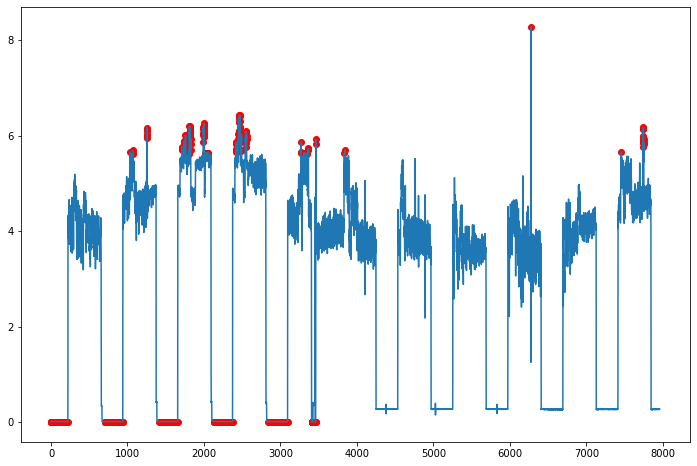

In [14]:
df = get_data(anom.loc[335773 - 730 * 4:335773 + 720 * 7] .reset_index(drop=True), \
              mode='original', emd=False, dimension='one')[1:, np.newaxis]
nu = 0.05  # theory says it should be an upper bound of the fraction of outliers
ocsvm = OneClassSVM(kernel='rbf', gamma=0.05, nu=nu) # {‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’}
ocsvm.fit(df)
preds = ocsvm.predict(df)
plt.figure(figsize=(12, 8))
plt.plot(np.arange(len(df)), df)
plt.scatter(np.where(preds == -1)[0], df[np.where(preds == -1)[0]], color='red')

### Оригинальные данные, одна размерность, с EMD
Трейн на всех

766
0 766
222 657 0
1483
766 1483
940 1375 1
2201
1483 2201
1658 2095 2
2919
2201 2919
2375 2810 3
3639
2919 3639
3095 3639 4
4359
3639 4359
3639 4250 5
5078
4359 5078
4535 4969 6
5798
5078 5798
5254 5689 7
6518
5798 6518
5974 6409 8
7238
6518 7238


C:\Users\Lomonosova\OneDrive\Документы\GitHub\diploma\data_preparation.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_AP'][st:end] = imfs[2] + df['total_AP'][st:end].mean()
C:\Users\Lomonosova\OneDrive\Документы\GitHub\diploma\data_preparation.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_AP'][st:end] = imfs[2] + df['total_AP'][st:end].mean()
C:\Users\Lomonosova\OneDrive\Документы\GitHub\diploma\data_preparation.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

6694 7129 9
7954
7238 7954
7414 7845 10


C:\Users\Lomonosova\OneDrive\Документы\GitHub\diploma\data_preparation.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_AP'][st:end] = imfs[2] + df['total_AP'][st:end].mean()


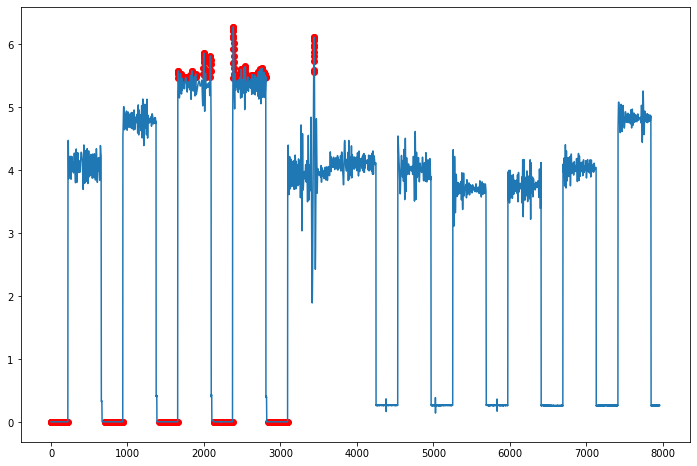

In [15]:
df = get_data(anom.loc[335773 - 730 * 4:335773 + 720 * 7].reset_index(drop=True), \
              mode='original', emd=True, dimension='one')[1:, np.newaxis]
nu = 0.05  # theory says it should be an upper bound of the fraction of outliers
ocsvm = OneClassSVM(kernel='rbf', gamma=0.05, nu=nu) # {‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’}
ocsvm.fit(df)
preds = ocsvm.predict(df)
plt.figure(figsize=(12, 8))
plt.plot(np.arange(len(df)), df)
plt.scatter(np.where(preds == -1)[0], df[np.where(preds == -1)[0]], color='red')

### Оригинальные данные, мульти размерность, без EMD
Трейн на всех

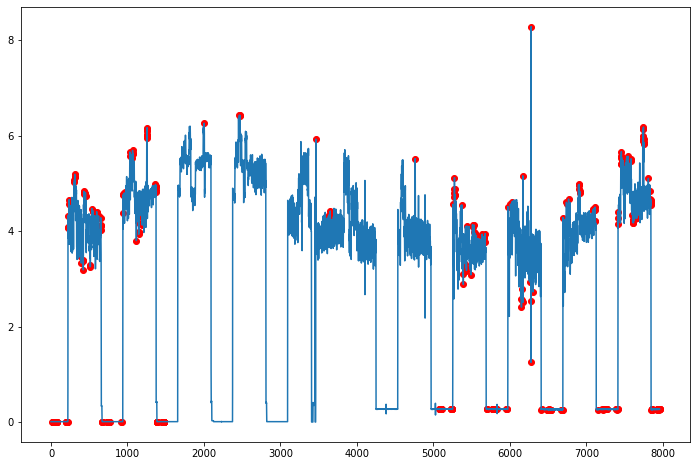

In [16]:
df = get_data(anom.loc[335773 - 730 * 4:335773 + 720 * 7].reset_index(drop=True), \
              mode='original', emd=False, dimension='multi')[1:]
nu = 0.05  # theory says it should be an upper bound of the fraction of outliers
ocsvm = OneClassSVM(kernel='rbf', gamma=0.05, nu=nu) # {‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’}
ocsvm.fit(df)
preds = ocsvm.predict(df)
plt.figure(figsize=(12, 8))
plt.plot(np.arange(len(df)), df[:, 0])
plt.scatter(np.where(preds == -1)[0], df[np.where(preds == -1)[0], 0], color='red')

### Оригинальные данные, мульти размерность, c EMD 
Трейн на всех

766
0 766
222 657 0
1483
766 1483
940 1375 1
2201
1483 2201
1658 2095 2
2919
2201 2919
2375 2810 3
3639
2919 3639
3095 3639 4
4359
3639 4359
3639 4250 5
5078
4359 5078
4535 4969 6
5798
5078 5798
5254 5689 7
6518
5798 6518
5974 6409 8


C:\Users\Lomonosova\OneDrive\Документы\GitHub\diploma\data_preparation.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_AP'][st:end] = imfs[2] + df['total_AP'][st:end].mean()
C:\Users\Lomonosova\OneDrive\Документы\GitHub\diploma\data_preparation.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_AP'][st:end] = imfs[2] + df['total_AP'][st:end].mean()
C:\Users\Lomonosova\OneDrive\Документы\GitHub\diploma\data_preparation.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

7238
6518 7238
6694 7129 9
7954
7238 7954
7414 7845 10


C:\Users\Lomonosova\OneDrive\Документы\GitHub\diploma\data_preparation.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_AP'][st:end] = imfs[2] + df['total_AP'][st:end].mean()


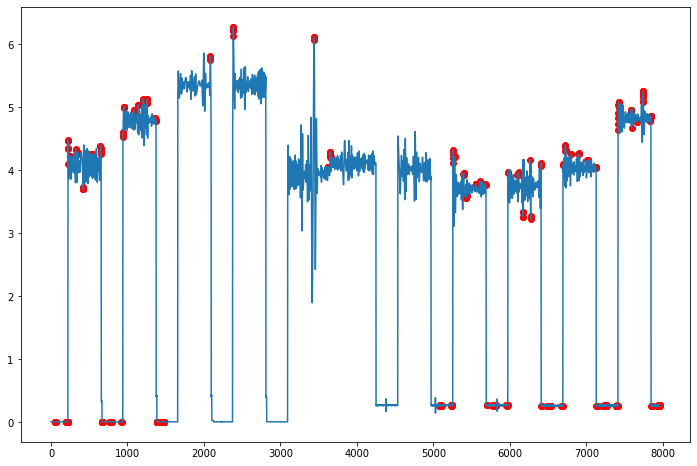

In [17]:
df = get_data(anom.loc[335773 - 730 * 4:335773 + 720 * 7].reset_index(drop=True), \
              mode='original', emd=True, dimension='multi')[1:]
nu = 0.05  # theory says it should be an upper bound of the fraction of outliers
ocsvm = OneClassSVM(kernel='rbf', gamma=0.05, nu=nu) # {‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’}
ocsvm.fit(df)
preds = ocsvm.predict(df)
plt.figure(figsize=(12, 8))
plt.plot(np.arange(len(df)), df[:, 0])
plt.scatter(np.where(preds == -1)[0], df[np.where(preds == -1)[0], 0], color='red')

### Оригинальные данные, одна размерность, без EMD 
Трейн на норм

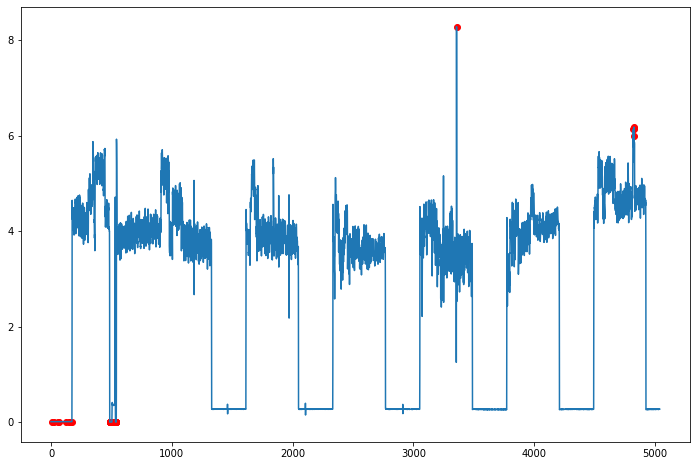

In [18]:
df = get_data(anom.loc[335773 - 730 * 4:335773].reset_index(drop=True), \
              mode='original', emd=False, dimension='one')[1:, np.newaxis]
nu = 0.05  # theory says it should be an upper bound of the fraction of outliers
ocsvm = OneClassSVM(kernel='rbf', gamma=0.05, nu=nu) # {‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’}
ocsvm.fit(df)

df = get_data(anom.loc[335773:335773 + 720 * 7].reset_index(drop=True), \
              mode='original', emd=False, dimension='one')[1:, np.newaxis]
preds = ocsvm.predict(df)
plt.figure(figsize=(12, 8))
plt.plot(np.arange(len(df)), df[:, 0])
plt.scatter(np.where(preds == -1)[0], df[np.where(preds == -1)[0], 0], color='red')

C:\Users\Lomonosova\OneDrive\Документы\GitHub\diploma\data_preparation.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  AP[i] = AP[i - 1]


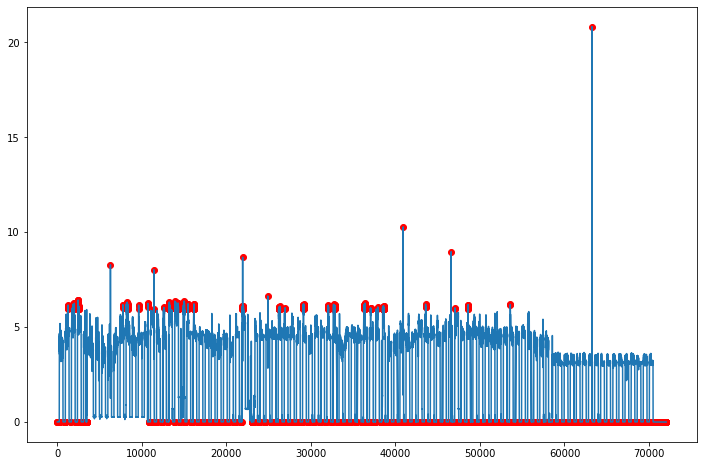

In [19]:
df = get_data(anom.loc[335773 - 730 * 4:].reset_index(drop=True), \
              mode='original', emd=False, dimension='one')[1:, np.newaxis]
preds = ocsvm.predict(df)
plt.figure(figsize=(12, 8))
plt.plot(np.arange(len(df)), df[:, 0])
plt.scatter(np.where(preds == -1)[0], df[np.where(preds == -1)[0], 0], color='red')

### Оригинальные данные, одна размерность, c EMD 
Трейн на норм

766
0 766
222 657 0
1483
766 1483
940 1375 1
2201
1483 2201
1658 2095 2
2919
2201 2919
2375 2810 3
1439
0 1439
175 1330 0
2158
1439 2158
1615 2049 1
2878
2158 2878
2334 2769 2
3598
2878 3598


C:\Users\Lomonosova\OneDrive\Документы\GitHub\diploma\data_preparation.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_AP'][st:end] = imfs[2] + df['total_AP'][st:end].mean()
C:\Users\Lomonosova\OneDrive\Документы\GitHub\diploma\data_preparation.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_AP'][st:end] = imfs[2] + df['total_AP'][st:end].mean()
C:\Users\Lomonosova\OneDrive\Документы\GitHub\diploma\data_preparation.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

3054 3489 3
4318
3598 4318
3774 4209 4
5034
4318 5034
4494 4925 5


C:\Users\Lomonosova\OneDrive\Документы\GitHub\diploma\data_preparation.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_AP'][st:end] = imfs[2] + df['total_AP'][st:end].mean()
C:\Users\Lomonosova\OneDrive\Документы\GitHub\diploma\data_preparation.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_AP'][st:end] = imfs[2] + df['total_AP'][st:end].mean()


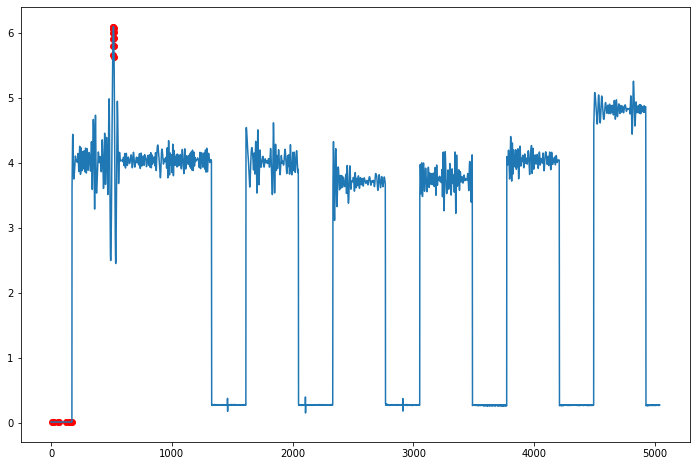

In [22]:
df = get_data(anom.loc[335773 - 730 * 4:335773].reset_index(drop=True), \
              mode='original', emd=True, dimension='one')[1:, np.newaxis]
nu = 0.05  # theory says it should be an upper bound of the fraction of outliers
ocsvm = OneClassSVM(kernel='rbf', gamma=0.05, nu=nu) # {‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’}
ocsvm.fit(df)

df = get_data(anom.loc[335773:335773 + 720 * 7].reset_index(drop=True), \
              mode='original', emd=True, dimension='one')[1:, np.newaxis]
preds = ocsvm.predict(df)
plt.figure(figsize=(12, 8))
plt.plot(np.arange(len(df)), df[:, 0])
plt.scatter(np.where(preds == -1)[0], df[np.where(preds == -1)[0], 0], color='red')


726
0 726
182 617 0
1443
726 1443
900 1335 1
2161
1443 2161
1618 2055 2
2879
2161 2879
2335 2770 3


C:\Users\Lomonosova\OneDrive\Документы\GitHub\diploma\data_preparation.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_AP'][st:end] = imfs[2] + df['total_AP'][st:end].mean()
C:\Users\Lomonosova\OneDrive\Документы\GitHub\diploma\data_preparation.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_AP'][st:end] = imfs[2] + df['total_AP'][st:end].mean()
C:\Users\Lomonosova\OneDrive\Документы\GitHub\diploma\data_preparation.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

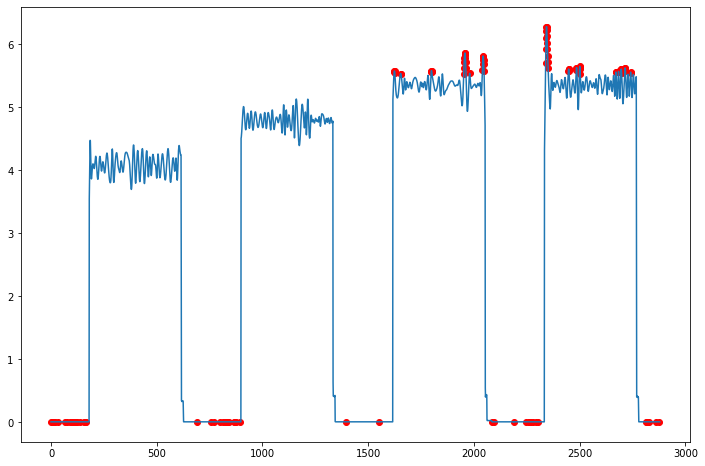

In [23]:
df = get_data(anom.loc[335773 - 720 * 4:335773].reset_index(drop=True), \
              mode='original', emd=True, dimension='one')[1:, np.newaxis]
preds = ocsvm.predict(df)
plt.figure(figsize=(12, 8))
plt.plot(np.arange(len(df)), df[:, 0])
plt.scatter(np.where(preds == -1)[0], df[np.where(preds == -1)[0], 0], color='red')

### Оригинальные данные, мульти размерность, без EMD 
Трейн на норм

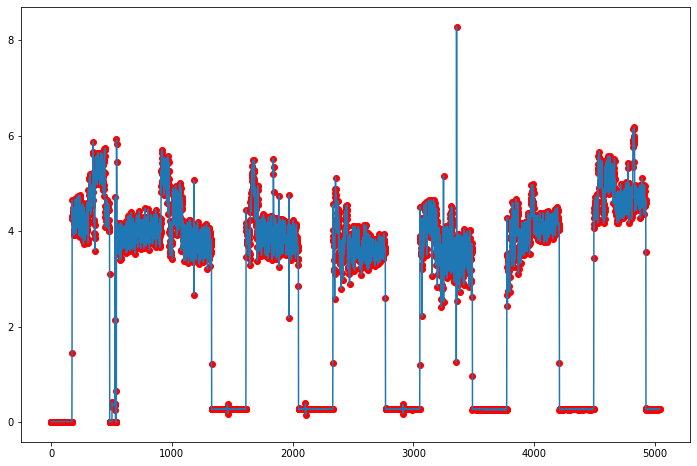

In [24]:
df = get_data(anom.loc[335773 - 730 * 4:335773].reset_index(drop=True), \
              mode='original', emd=False, dimension='multi')[1:]
nu = 0.05  # theory says it should be an upper bound of the fraction of outliers
ocsvm = OneClassSVM(kernel='rbf', gamma=0.05, nu=nu) # {‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’}
ocsvm.fit(df)

df = get_data(anom.loc[335773:335773 + 720 * 7].reset_index(drop=True), \
              mode='original', emd=False, dimension='multi')[1:]
preds = ocsvm.predict(df)
plt.figure(figsize=(12, 8))
plt.plot(np.arange(len(df)), df[:, 0])
plt.scatter(np.where(preds == -1)[0], df[np.where(preds == -1)[0], 0], color='red')

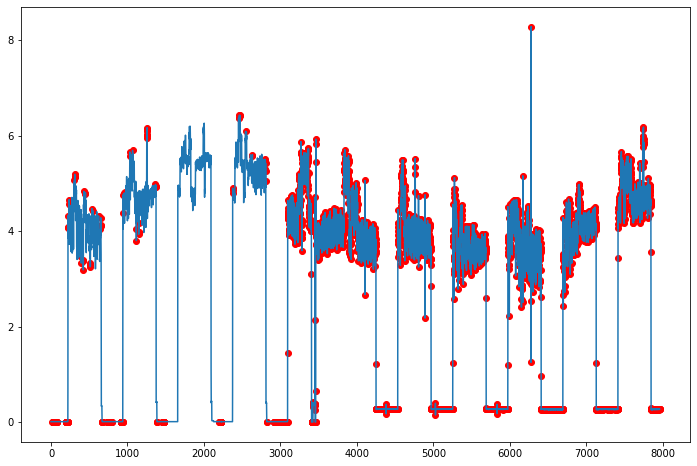

In [25]:
df = get_data(anom.loc[335773 - 730 * 4:335773 + 720 * 7].reset_index(drop=True), \
              mode='original', emd=False, dimension='multi')[1:]
preds = ocsvm.predict(df)
plt.figure(figsize=(12, 8))
plt.plot(np.arange(len(df)), df[:, 0])
plt.scatter(np.where(preds == -1)[0], df[np.where(preds == -1)[0], 0], color='red')

### Оригинальные данные, мульти размерность, c EMD 
Трейн на норм

766
0 766
222 657 0
1483
766 1483
940 1375 1
2201
1483 2201
1658 2095 2
2919
2201 2919
2375 2810 3
1439
0 1439
175 1330 0
2158
1439 2158
1615 2049 1
2878
2158 2878
2334 2769 2
3598
2878 3598


C:\Users\Lomonosova\OneDrive\Документы\GitHub\diploma\data_preparation.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_AP'][st:end] = imfs[2] + df['total_AP'][st:end].mean()
C:\Users\Lomonosova\OneDrive\Документы\GitHub\diploma\data_preparation.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_AP'][st:end] = imfs[2] + df['total_AP'][st:end].mean()
C:\Users\Lomonosova\OneDrive\Документы\GitHub\diploma\data_preparation.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

3054 3489 3
4318
3598 4318
3774 4209 4
5034
4318 5034
4494 4925 5


C:\Users\Lomonosova\OneDrive\Документы\GitHub\diploma\data_preparation.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_AP'][st:end] = imfs[2] + df['total_AP'][st:end].mean()
C:\Users\Lomonosova\OneDrive\Документы\GitHub\diploma\data_preparation.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_AP'][st:end] = imfs[2] + df['total_AP'][st:end].mean()


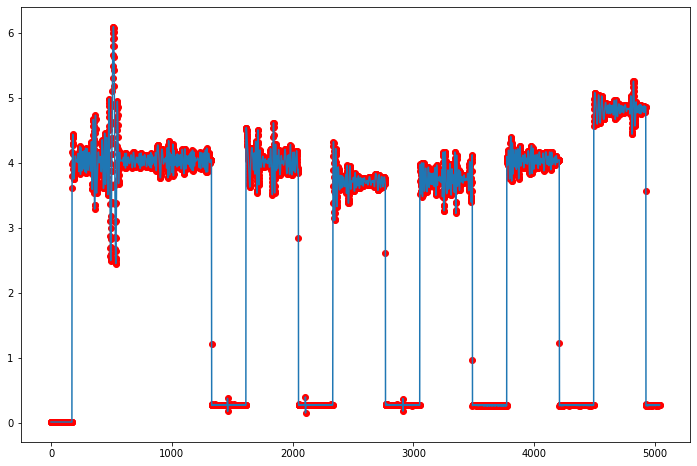

In [27]:
df = get_data(anom.loc[335773 - 730 * 4:335773].reset_index(drop=True), \
              mode='original', emd=True, dimension='multi')[1:]
nu = 0.05  # theory says it should be an upper bound of the fraction of outliers
ocsvm = OneClassSVM(kernel='rbf', gamma=0.05, nu=nu) # {‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’}
ocsvm.fit(df)

df = get_data(anom.loc[335773:335773 + 720 * 7].reset_index(drop=True), \
              mode='original', emd=True, dimension='multi')[1:]
preds = ocsvm.predict(df)
plt.figure(figsize=(12, 8))
plt.plot(np.arange(len(df)), df[:, 0])
plt.scatter(np.where(preds == -1)[0], df[np.where(preds == -1)[0], 0], color='red')

766
0 766
222 657 0
1483
766 1483
940 1375 1
2201
1483 2201
1658 2095 2
2919
2201 2919
2375 2810 3
3639
2919 3639
3095 3639 4
4359
3639 4359
3639 4250 5
5078
4359 5078
4535 4969 6
5798
5078 5798
5254 5689 7
6518
5798 6518
5974 6409 8
7238
6518 7238

C:\Users\Lomonosova\OneDrive\Документы\GitHub\diploma\data_preparation.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_AP'][st:end] = imfs[2] + df['total_AP'][st:end].mean()
C:\Users\Lomonosova\OneDrive\Документы\GitHub\diploma\data_preparation.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_AP'][st:end] = imfs[2] + df['total_AP'][st:end].mean()
C:\Users\Lomonosova\OneDrive\Документы\GitHub\diploma\data_preparation.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st


6694 7129 9
7954
7238 7954
7414 7845 10


C:\Users\Lomonosova\OneDrive\Документы\GitHub\diploma\data_preparation.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_AP'][st:end] = imfs[2] + df['total_AP'][st:end].mean()


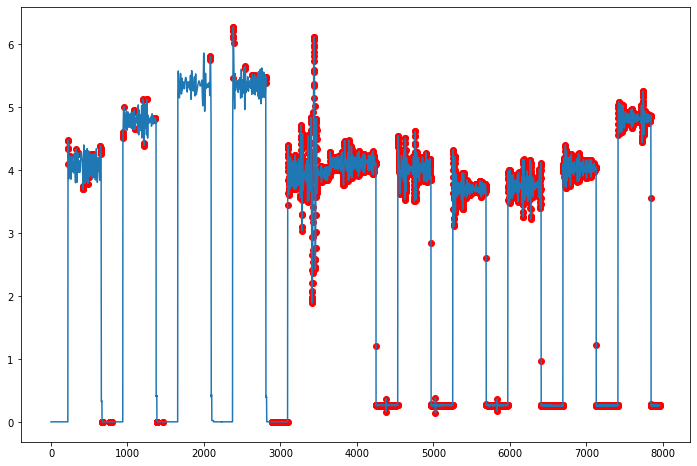

In [28]:
df = get_data(anom.loc[335773 - 730 * 4:335773 + 720 * 7].reset_index(drop=True), \
              mode='original', emd=True, dimension='multi')[1:]
preds = ocsvm.predict(df)
plt.figure(figsize=(12, 8))
plt.plot(np.arange(len(df)), df[:, 0])
plt.scatter(np.where(preds == -1)[0], df[np.where(preds == -1)[0], 0], color='red')

### Суточные данные, одна размерность, без EMD 
Трейн на всех

[  48  766 1483 2201 2919 3639 4359 5078 5798 6518 7238 7954]
48 766 0
766 1483 1
1483 2201 2
2201 2919 3
2919 3639 4
3639 4359 5
4359 5078 6
5078 5798 7
5798 6518 8
6518 7238 9
7238 7954 10


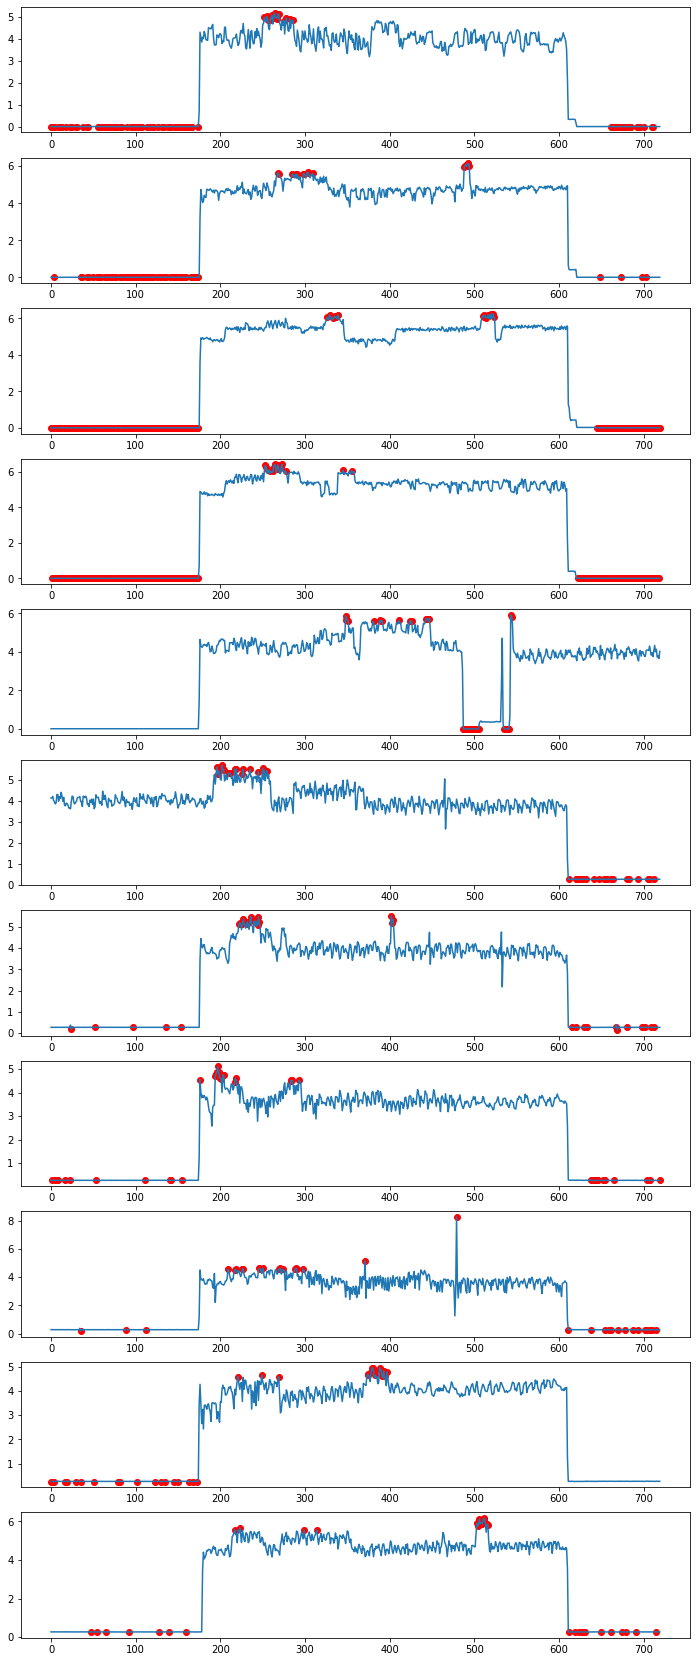

In [29]:
df = get_data(anom.loc[335773 - 730 * 4:335773 + 720 * 7].reset_index(drop=True), \
              mode='windows', emd=False, dimension='one')
df[0][0] = 0
nu = 0.05  # theory says it should be an upper bound of the fraction of outliers
ocsvm = OneClassSVM(kernel='rbf', gamma=0.05, nu=nu) # {‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’}

fig, ax = plt.subplots(figsize=(12, 30), nrows=len(df), ncols=1)#(, rows=5)

i = 0
for day in df:
    ocsvm.fit(day[:, np.newaxis])
    preds = ocsvm.predict(day[:, np.newaxis])
    #print(preds)

    ax[i].plot(np.arange(len(day)), day)
    ax[i].scatter(np.where(preds == -1)[0], day[np.where(preds == -1)[0]], color='red')
    i += 1

### Суточные данные, одна размерность, с EMD 
Трейн на всех

766
0 766
222 657 0
1483
766 1483
940 1375 1
2201
1483 2201
1658 2095 2
2919
2201 2919
2375 2810 3
3639
2919 3639
3095 3639 4
4359
3639 4359
3639 4250 5
5078
4359 5078
4535 4969 6
5798
5078 5798
5254 5689 7
6518
5798 6518
5974 6409 8
7238
6518 7238


C:\Users\Lomonosova\OneDrive\Документы\GitHub\diploma\data_preparation.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_AP'][st:end] = imfs[2] + df['total_AP'][st:end].mean()
C:\Users\Lomonosova\OneDrive\Документы\GitHub\diploma\data_preparation.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_AP'][st:end] = imfs[2] + df['total_AP'][st:end].mean()
C:\Users\Lomonosova\OneDrive\Документы\GitHub\diploma\data_preparation.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

6694 7129 9
7954
7238 7954
7414 7845 10
[  48  766 1483 2201 2919 3639 4359 5078 5798 6518 7238 7954]
48 766 0
766 1483 1
1483 2201 2
2201 2919 3
2919 3639 4
3639 4359 5
4359 5078 6
5078 5798 7
5798 6518 8
6518 7238 9
7238 7954 10
(11, 720)


C:\Users\Lomonosova\OneDrive\Документы\GitHub\diploma\data_preparation.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_AP'][st:end] = imfs[2] + df['total_AP'][st:end].mean()


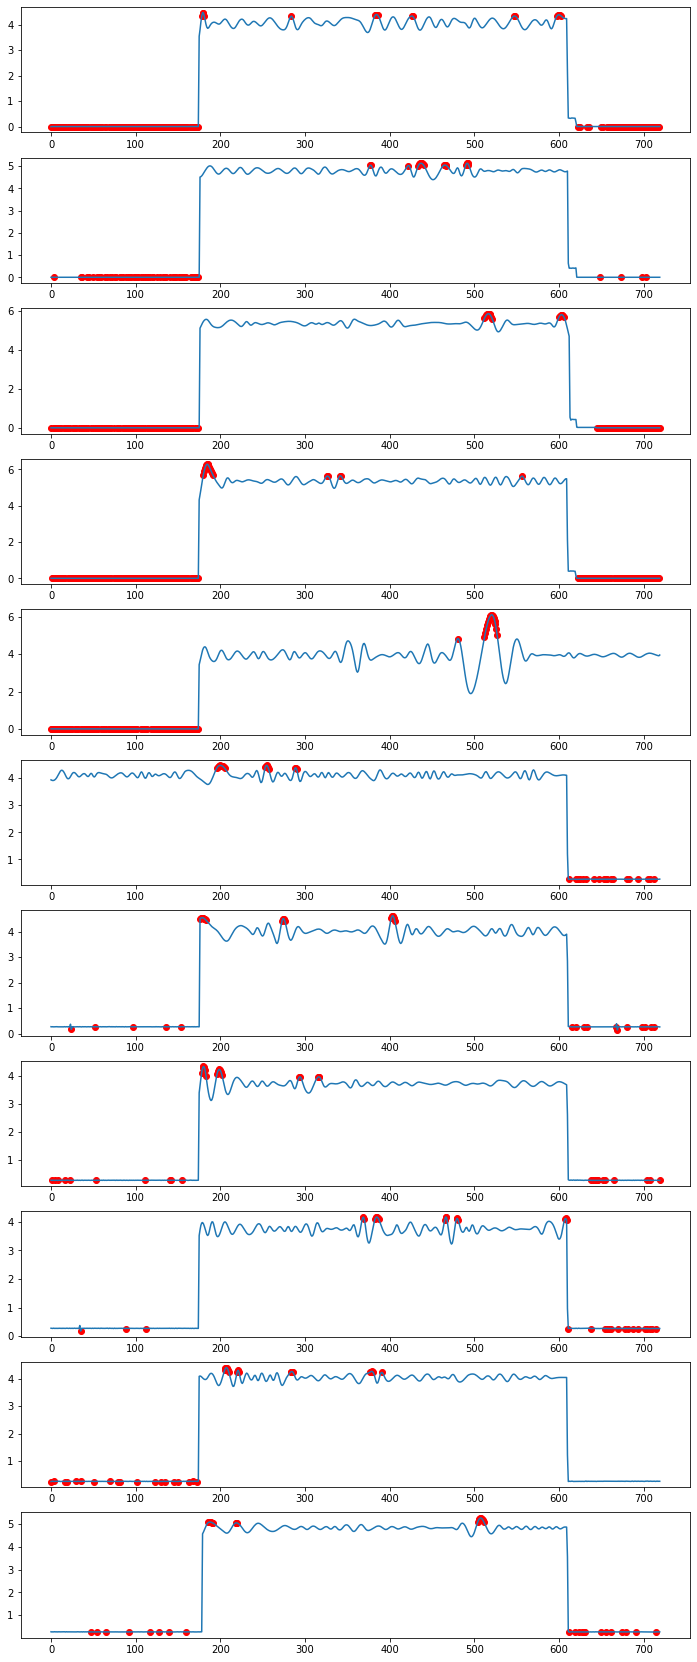

In [30]:
df = get_data(anom.loc[335773 - 730 * 4:335773 + 720 * 7].reset_index(drop=True), \
              mode='windows', emd=True, dimension='one')
df[0][0] = 0
nu = 0.05  # theory says it should be an upper bound of the fraction of outliers
ocsvm = OneClassSVM(kernel='rbf', gamma=0.05, nu=nu) # {‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’}

fig, ax = plt.subplots(figsize=(12, 30), nrows=len(df), ncols=1)#(, rows=5)
print(df.shape)
i = 0
for day in df:
    ocsvm.fit(day[:, np.newaxis])
    preds = ocsvm.predict(day[:, np.newaxis])
    #print(preds)

    ax[i].plot(np.arange(len(day)), day)
    ax[i].scatter(np.where(preds == -1)[0], day[np.where(preds == -1)[0]], color='red')
    i += 1

### Суточные данные, мульти размерность, без EMD 
Трейн на всех

(11, 720, 5)


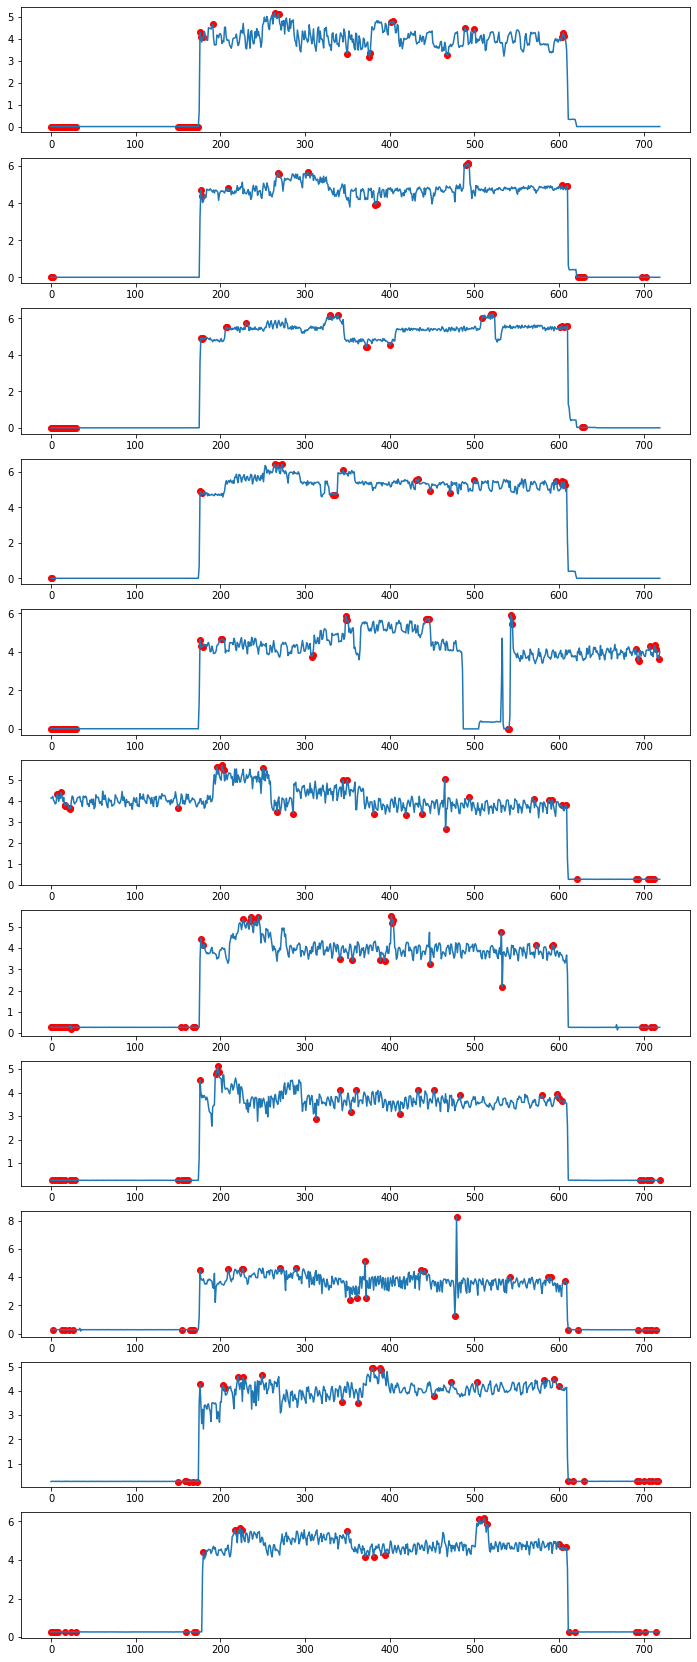

In [31]:
df = get_data(anom.loc[335773 - 730 * 4:335773 + 720 * 7].reset_index(drop=True), \
              mode='windows', emd=False, dimension='multi')
df[0][0] = np.zeros(len(df[0][0]))
nu = 0.05  # theory says it should be an upper bound of the fraction of outliers
ocsvm = OneClassSVM(kernel='rbf', gamma=0.05, nu=nu) # {‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’}

fig, ax = plt.subplots(figsize=(12, 30), nrows=len(df), ncols=1)#(, rows=5)
print(df.shape)
i = 0
for day in df:
    ocsvm.fit(day)
    preds = ocsvm.predict(day)
    #print(preds)

    ax[i].plot(np.arange(len(day)), day[:, 0])
    ax[i].scatter(np.where(preds == -1)[0], day[np.where(preds == -1)[0]][:, 0], color='red')
    i += 1

### Суточные данные, мульти размерность, с EMD 
Трейн на всех

766
0 766
222 657 0
1483
766 1483
940 1375 1
2201
1483 2201
1658 2095 2
2919
2201 2919
2375 2810 3
3639
2919 3639
3095 3639 4
4359
3639 4359
3639 4250 5
5078
4359 5078
4535 4969 6
5798
5078 5798
5254 5689 7
6518
5798 6518
5974 6409 8
7238
6518 7238


C:\Users\Lomonosova\OneDrive\Документы\GitHub\diploma\data_preparation.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_AP'][st:end] = imfs[2] + df['total_AP'][st:end].mean()
C:\Users\Lomonosova\OneDrive\Документы\GitHub\diploma\data_preparation.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_AP'][st:end] = imfs[2] + df['total_AP'][st:end].mean()
C:\Users\Lomonosova\OneDrive\Документы\GitHub\diploma\data_preparation.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

6694 7129 9
7954
7238 7954
7414 7845 10
(11, 720, 5)


C:\Users\Lomonosova\OneDrive\Документы\GitHub\diploma\data_preparation.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_AP'][st:end] = imfs[2] + df['total_AP'][st:end].mean()


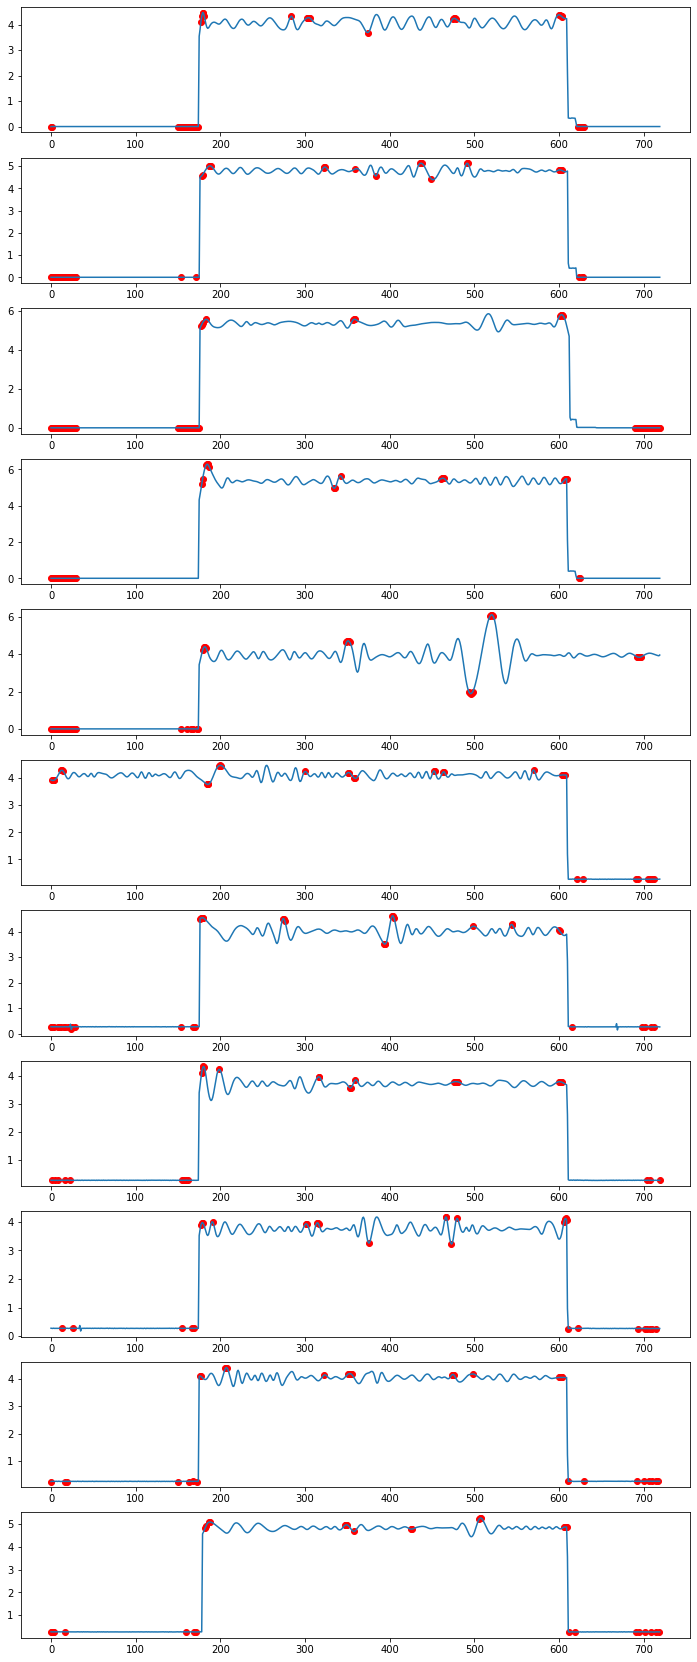

In [32]:
df = get_data(anom.loc[335773 - 730 * 4:335773 + 720 * 7].reset_index(drop=True), \
              mode='windows', emd=True, dimension='multi')
df[0][0] = np.zeros(len(df[0][0]))
nu = 0.05  # theory says it should be an upper bound of the fraction of outliers
ocsvm = OneClassSVM(kernel='rbf', gamma=0.05, nu=nu) # {‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’}

fig, ax = plt.subplots(figsize=(12, 30), nrows=len(df), ncols=1)#(, rows=5)
print(df.shape)
i = 0
for day in df:
    ocsvm.fit(day)
    preds = ocsvm.predict(day)
    #print(preds)

    ax[i].plot(np.arange(len(day)), day[:, 0])
    ax[i].scatter(np.where(preds == -1)[0], day[np.where(preds == -1)[0]][:, 0], color='red')
    i += 1

### Суточные данные, одна размерность, без EMD 
Трейн на норм

[  48  766 1483 2201 2919]
48 766 0
766 1483 1
1483 2201 2
2201 2919 3
(4, 720)
[ 719 1439 2158 2878 3598 4318 5034]
719 1439 0
1439 2158 1
2158 2878 2
2878 3598 3
3598 4318 4
4318 5034 5


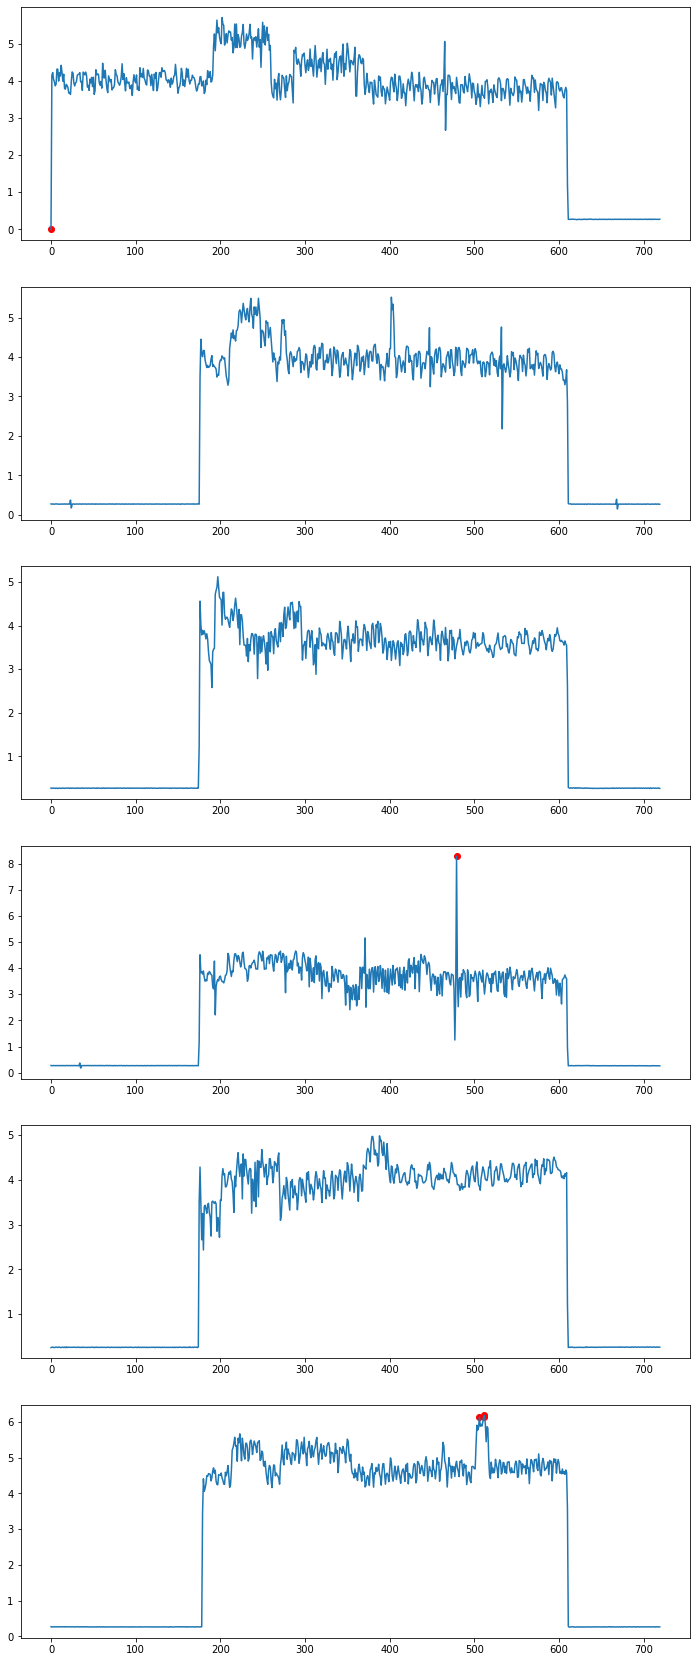

In [35]:
df = get_data(anom.loc[335773 - 730 * 4:335773].reset_index(drop=True), \
              mode='windows', emd=False, dimension='one')
df[0][0] = 0
nu = 0.05  # theory says it should be an upper bound of the fraction of outliers
ocsvm = OneClassSVM(kernel='rbf', gamma=0.05, nu=nu) # {‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’}

#(, rows=5)
print(df.shape)
i = 0
for day in df:
    ocsvm.fit(day[:, np.newaxis])
    
    #print(preds)

df = get_data(anom.loc[335773:335773 + 720 * 7].reset_index(drop=True), \
              mode='windows', emd=False, dimension='one')
df[0][0] = 0
fig, ax = plt.subplots(figsize=(12, 30), nrows=len(df), ncols=1)
for day in df:
    preds = ocsvm.predict(day[:, np.newaxis])
    ax[i].plot(np.arange(len(day)), day)
    ax[i].scatter(np.where(preds == -1)[0], day[np.where(preds == -1)[0]], color='red')
    i += 1

[  48  766 1483 2201 2919]
48 766 0
766 1483 1
1483 2201 2
2201 2919 3


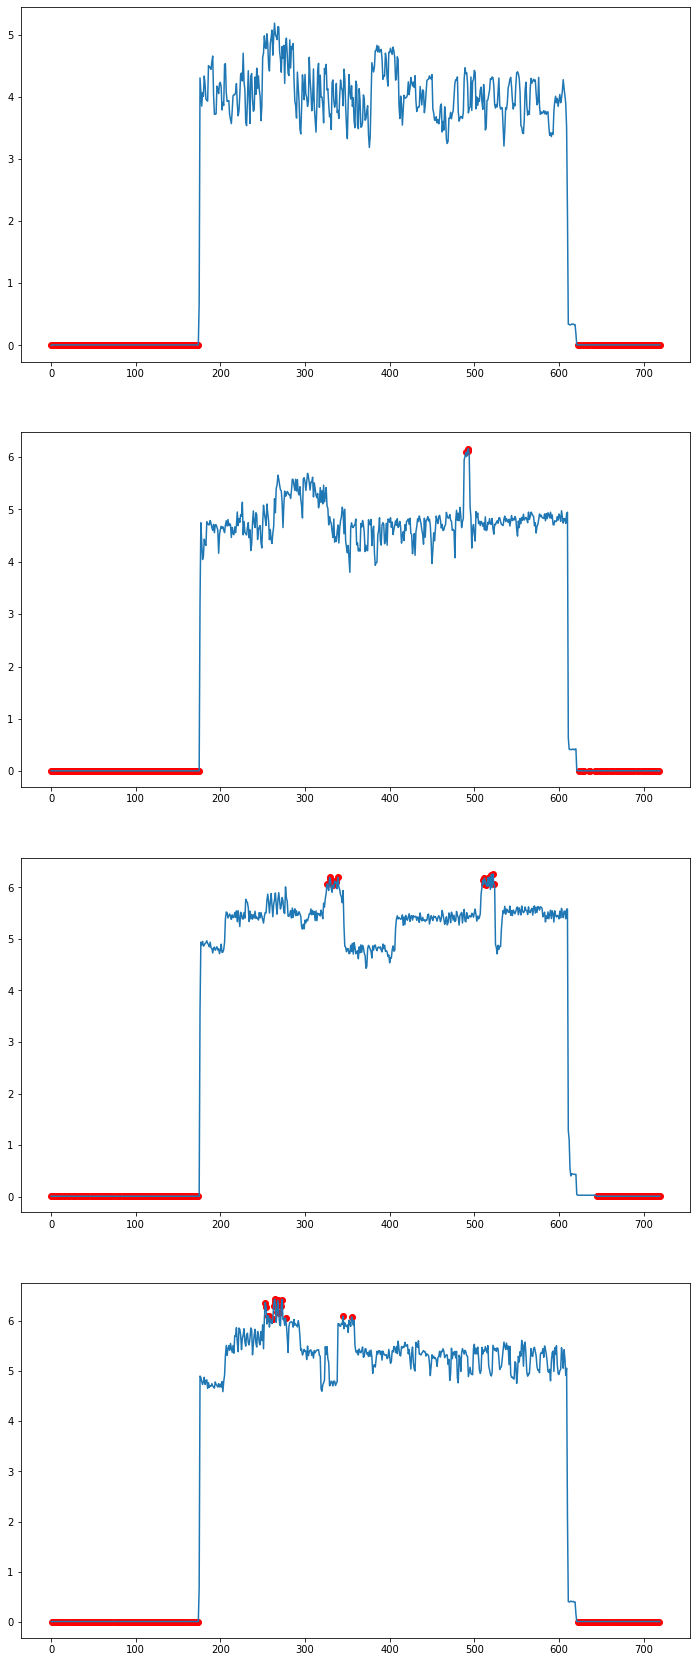

In [36]:
df = get_data(anom.loc[335773 - 730 * 4:335773].reset_index(drop=True), \
              mode='windows', emd=False, dimension='one')
df[0][0] = 0
fig, ax = plt.subplots(figsize=(12, 30), nrows=len(df), ncols=1)
i =0
for day in df:
    preds = ocsvm.predict(day[:, np.newaxis])
    ax[i].plot(np.arange(len(day)), day)
    ax[i].scatter(np.where(preds == -1)[0], day[np.where(preds == -1)[0]], color='red')
    i += 1

### Суточные данные, одна размерность, с EMD 
Трейн на норм

766
0 766
222 657 0
1483
766 1483
940 1375 1
2201
1483 2201
1658 2095 2
2919
2201 2919
2375 2810 3
[  48  766 1483 2201 2919]
48 766 0
766 1483 1
1483 2201 2
2201 2919 3
(4, 720)
1439
0 1439
175 1330 0


C:\Users\Lomonosova\OneDrive\Документы\GitHub\diploma\data_preparation.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_AP'][st:end] = imfs[2] + df['total_AP'][st:end].mean()
C:\Users\Lomonosova\OneDrive\Документы\GitHub\diploma\data_preparation.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_AP'][st:end] = imfs[2] + df['total_AP'][st:end].mean()
C:\Users\Lomonosova\OneDrive\Документы\GitHub\diploma\data_preparation.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

2158
1439 2158
1615 2049 1
2878
2158 2878
2334 2769 2
3598
2878 3598
3054 3489 3
4318
3598 4318
3774 4209 4
5034
4318 5034
4494 4925 5
[ 719 1439 2158 2878 3598 4318 5034]
719 1439 0
1439 2158 1
2158 2878 2
2878 3598 3
3598 4318 4
4318 5034 5


C:\Users\Lomonosova\OneDrive\Документы\GitHub\diploma\data_preparation.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_AP'][st:end] = imfs[2] + df['total_AP'][st:end].mean()
C:\Users\Lomonosova\OneDrive\Документы\GitHub\diploma\data_preparation.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_AP'][st:end] = imfs[2] + df['total_AP'][st:end].mean()
C:\Users\Lomonosova\OneDrive\Документы\GitHub\diploma\data_preparation.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

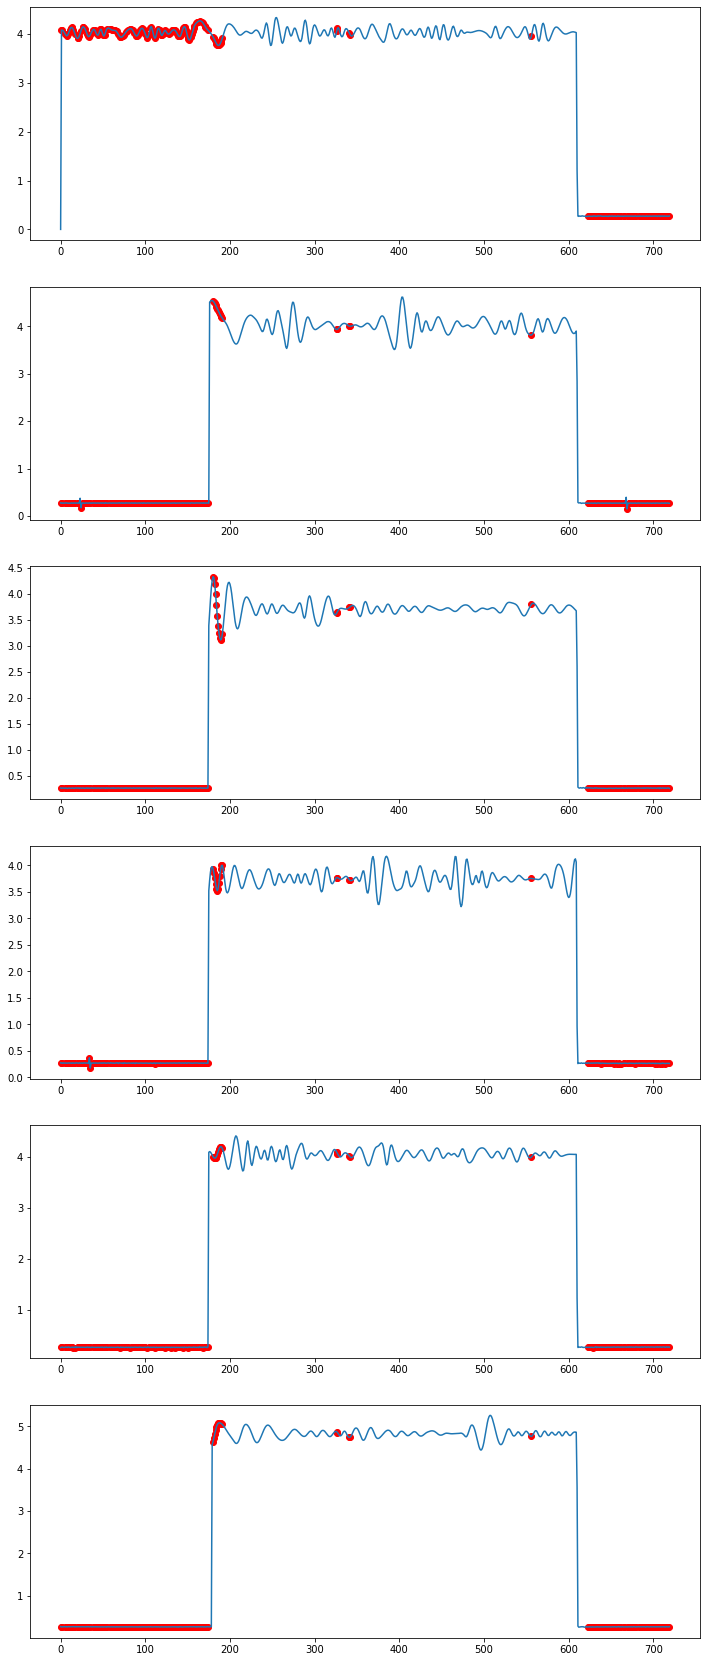

In [37]:
df = get_data(anom.loc[335773 - 730 * 4:335773].reset_index(drop=True), \
              mode='windows', emd=True, dimension='one')
df[0][0] = 0
nu = 0.05  # theory says it should be an upper bound of the fraction of outliers
ocsvm = OneClassSVM(kernel='rbf', gamma=0.05, nu=nu) # {‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’}

#(, rows=5)
print(df.shape)
i = 0
for day in df:
    ocsvm.fit(day[:, np.newaxis])
    preds = ocsvm.predict(day[:, np.newaxis])
    #print(preds)

df = get_data(anom.loc[335773:335773 + 720 * 7].reset_index(drop=True), \
              mode='windows', emd=True, dimension='one')
df[0][0] = 0
fig, ax = plt.subplots(figsize=(12, 30), nrows=len(df), ncols=1)
for day in df:
    ax[i].plot(np.arange(len(day)), day)
    ax[i].scatter(np.where(preds == -1)[0], day[np.where(preds == -1)[0]], color='red')
    i += 1

766
0 766
222 657 0
1483
766 1483
940 1375 1
2201
1483 2201
1658 2095 2
2919
2201 2919
2375 2810 3
[  48  766 1483 2201 2919]
48 766 0
766 1483 1
1483 2201 2
2201 2919 3


C:\Users\Lomonosova\OneDrive\Документы\GitHub\diploma\data_preparation.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_AP'][st:end] = imfs[2] + df['total_AP'][st:end].mean()
C:\Users\Lomonosova\OneDrive\Документы\GitHub\diploma\data_preparation.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_AP'][st:end] = imfs[2] + df['total_AP'][st:end].mean()
C:\Users\Lomonosova\OneDrive\Документы\GitHub\diploma\data_preparation.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

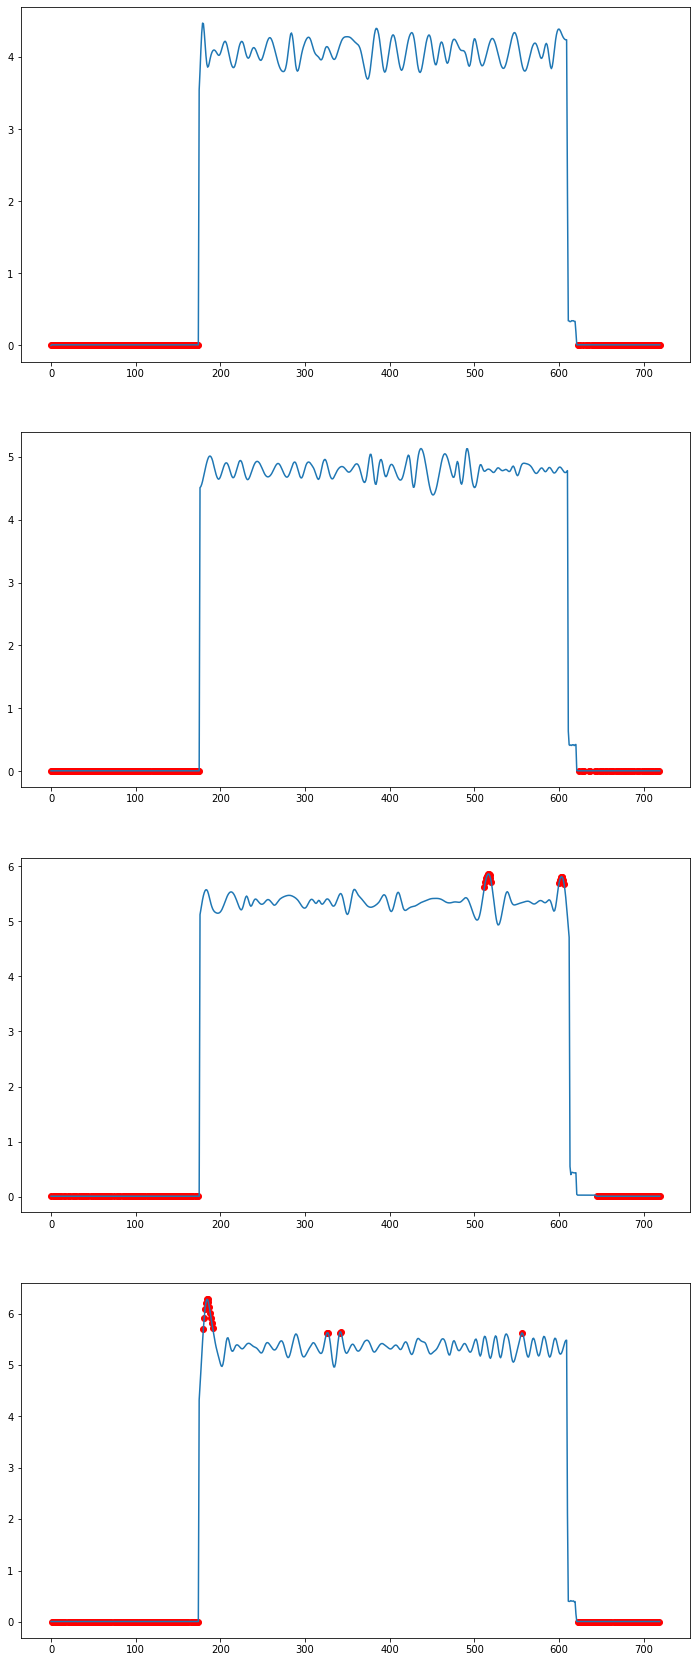

In [38]:
df = get_data(anom.loc[335773 - 730 * 4:335773].reset_index(drop=True), \
              mode='windows', emd=True, dimension='one')
df[0][0] = 0
fig, ax = plt.subplots(figsize=(12, 30), nrows=len(df), ncols=1)
i =0
for day in df:
    preds = ocsvm.predict(day[:, np.newaxis])
    ax[i].plot(np.arange(len(day)), day)
    ax[i].scatter(np.where(preds == -1)[0], day[np.where(preds == -1)[0]], color='red')
    i += 1

### Суточные данные, мульти размерность, без EMD 
Трейн на норм

[ 719 1439 2158 2878 3598 4318 5034]
719 1439 0
1439 2158 1
2158 2878 2
2878 3598 3
3598 4318 4
4318 5034 5


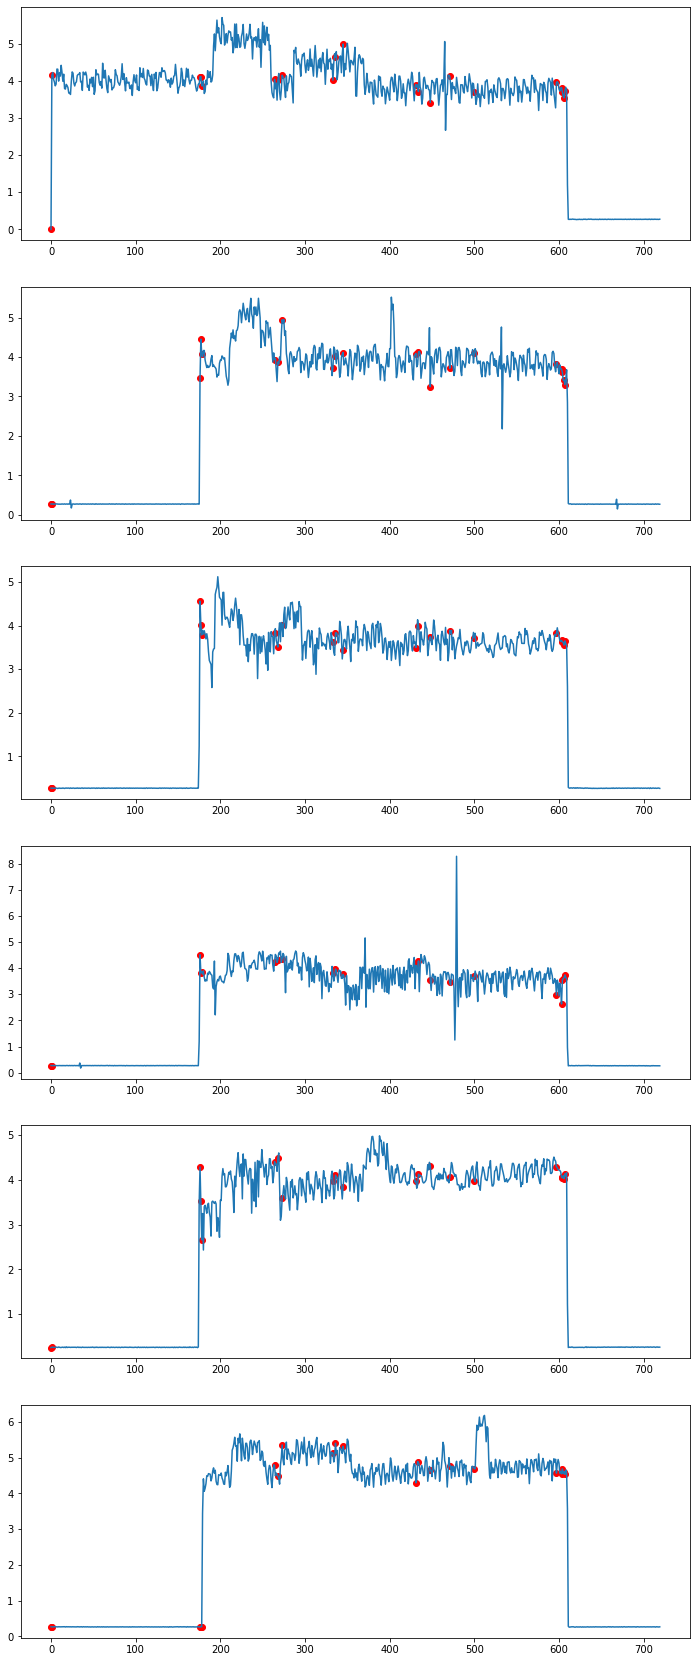

In [39]:
df = get_data(anom.loc[335773 - 730 * 4:335773].reset_index(drop=True), \
              mode='windows', emd=False, dimension='multi')
df[0][0] = np.zeros(len(df[0][0]))
nu = 0.05  # theory says it should be an upper bound of the fraction of outliers
ocsvm = OneClassSVM(kernel='rbf', gamma=0.05, nu=nu) # {‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’}

i = 0
for day in df:
    ocsvm.fit(day)
    preds = ocsvm.predict(day)
    #print(preds)

df = get_data(anom.loc[335773:335773 + 720 * 7].reset_index(drop=True), \
              mode='windows', emd=False, dimension='one')
df[0][0] = 0
fig, ax = plt.subplots(figsize=(12, 30), nrows=len(df), ncols=1)
for day in df:
    ax[i].plot(np.arange(len(day)), day)
    ax[i].scatter(np.where(preds == -1)[0], day[np.where(preds == -1)[0]], color='red')
    i += 1

### Суточные данные, мульти размерность, с EMD 
Трейн на норм

In [40]:
df = get_data(anom.loc[335773 - 730 * 4:].reset_index(drop=True), \
              mode='windows', emd=True, dimension='multi')
df[0][0] = np.zeros(len(df[0][0]))
nu = 0.05  # theory says it should be an upper bound of the fraction of outliers
ocsvm = OneClassSVM(kernel='rbf', gamma=0.05, nu=nu) # {‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’}

i = 0
for day in df:
    ocsvm.fit(day)
    preds = ocsvm.predict(day)
    #print(preds)

df = get_data(anom.loc[335773:335773 + 720 * 7].reset_index(drop=True), \
              mode='windows', emd=True, dimension='one')
df[0][0] = 0
fig, ax = plt.subplots(figsize=(12, 30), nrows=len(df), ncols=1)
for day in df:
    ax[i].plot(np.arange(len(day)), day)
    ax[i].scatter(np.where(preds == -1)[0], day[np.where(preds == -1)[0]], color='red')
    i += 1

C:\Users\Lomonosova\OneDrive\Документы\GitHub\diploma\data_preparation.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  AP[i] = AP[i - 1]


766
0 766
222 657 0
1483
766 1483
940 1375 1
2201
1483 2201
1658 2095 2
2919
2201 2919
2375 2810 3
3639
2919 3639
3095 3639 4
4359
3639 4359
3639 4250 5
5078
4359 5078
4535 4969 6
5798
5078 5798
5254 5689 7
6518
5798 6518
5974 6409 8


C:\Users\Lomonosova\OneDrive\Документы\GitHub\diploma\data_preparation.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_AP'][st:end] = imfs[2] + df['total_AP'][st:end].mean()
C:\Users\Lomonosova\OneDrive\Документы\GitHub\diploma\data_preparation.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_AP'][st:end] = imfs[2] + df['total_AP'][st:end].mean()
C:\Users\Lomonosova\OneDrive\Документы\GitHub\diploma\data_preparation.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

7238
6518 7238
6694 7129 9
7954
7238 7954
7414 7845 10
8674
7954 8674
8123 8565 11
9394
8674 9394
8851 9285 12
10114
9394 10114
9563 10005 13
10832
10114 10832
10283 10741 14
11552
10832 11552
11008 11458 15


C:\Users\Lomonosova\OneDrive\Документы\GitHub\diploma\data_preparation.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_AP'][st:end] = imfs[2] + df['total_AP'][st:end].mean()
C:\Users\Lomonosova\OneDrive\Документы\GitHub\diploma\data_preparation.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_AP'][st:end] = imfs[2] + df['total_AP'][st:end].mean()
C:\Users\Lomonosova\OneDrive\Документы\GitHub\diploma\data_preparation.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

12272
11552 12272
11728 12163 16
37471
12272 37471
12449 37362 17
38191
37471 38191
37643 38083 18
38911
38191 38911
38366 38803 19
39631
38911 39631
39081 39523 20
40351
39631 40351
39808 40251 21
41072
40351 41072
40528 40963 22
41792
41072 41792
41248 41683 23
42512
41792 42512
41968 42403 24
43231
42512 43231


C:\Users\Lomonosova\OneDrive\Документы\GitHub\diploma\data_preparation.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_AP'][st:end] = imfs[2] + df['total_AP'][st:end].mean()
C:\Users\Lomonosova\OneDrive\Документы\GitHub\diploma\data_preparation.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_AP'][st:end] = imfs[2] + df['total_AP'][st:end].mean()
C:\Users\Lomonosova\OneDrive\Документы\GitHub\diploma\data_preparation.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

42688 43143 25
43951
43231 43951
43408 43850 26
44671
43951 44671
44128 44572 27
45391
44671 45391
44842 45282 28
46111
45391 46111
45562 46007 29
46831
46111 46831
46288 46729 30
47551
46831 47551
47007 47478 31
48271
47551 48271
47722 48171 32
48991
48271 48991
48442 48890 33
49711
48991 49711


C:\Users\Lomonosova\OneDrive\Документы\GitHub\diploma\data_preparation.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_AP'][st:end] = imfs[2] + df['total_AP'][st:end].mean()
C:\Users\Lomonosova\OneDrive\Документы\GitHub\diploma\data_preparation.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_AP'][st:end] = imfs[2] + df['total_AP'][st:end].mean()
C:\Users\Lomonosova\OneDrive\Документы\GitHub\diploma\data_preparation.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

49162 49612 34
50431
49711 50431
49884 50332 35
51151
50431 51151
50608 51051 36
51871
51151 51871
51328 51768 37
52588
51871 52588
52044 52487 38
53308
52588 53308
52764 53207 39
54028
53308 54028
53479 53919 40
54748
54028 54748
54198 54639 41
55468
54748 55468
54924 55359 42


C:\Users\Lomonosova\OneDrive\Документы\GitHub\diploma\data_preparation.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_AP'][st:end] = imfs[2] + df['total_AP'][st:end].mean()
C:\Users\Lomonosova\OneDrive\Документы\GitHub\diploma\data_preparation.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_AP'][st:end] = imfs[2] + df['total_AP'][st:end].mean()
C:\Users\Lomonosova\OneDrive\Документы\GitHub\diploma\data_preparation.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

56188
55468 56188
55644 56079 43
56908
56188 56908
56364 56799 44
57628
56908 57628
57084 57529 45
58347
57628 58347
57804 58113 46
59066
58347 59066
58565 58967 47
59786
59066 59786
59243 59677 48
60506
59786 60506
59963 60407 49
61226
60506 61226
60683 61125 50
61946
61226 61946
61403 61839 51


C:\Users\Lomonosova\OneDrive\Документы\GitHub\diploma\data_preparation.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_AP'][st:end] = imfs[2] + df['total_AP'][st:end].mean()
C:\Users\Lomonosova\OneDrive\Документы\GitHub\diploma\data_preparation.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_AP'][st:end] = imfs[2] + df['total_AP'][st:end].mean()
C:\Users\Lomonosova\OneDrive\Документы\GitHub\diploma\data_preparation.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

62666
61946 62666
62123 62557 52
63386
62666 63386
62843 63277 53
64106
63386 64106
63562 64007 54
64826
64106 64826
64282 64717 55
65546
64826 65546
65002 65437 56
66266
65546 66266
65723 66157 57
66986
66266 66986
66443 66877 58


C:\Users\Lomonosova\OneDrive\Документы\GitHub\diploma\data_preparation.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_AP'][st:end] = imfs[2] + df['total_AP'][st:end].mean()
C:\Users\Lomonosova\OneDrive\Документы\GitHub\diploma\data_preparation.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_AP'][st:end] = imfs[2] + df['total_AP'][st:end].mean()
C:\Users\Lomonosova\OneDrive\Документы\GitHub\diploma\data_preparation.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

67706
66986 67706
67163 67597 59
68426
67706 68426
67883 68317 60
69146
68426 69146
68603 69037 61
69866
69146 69866
69322 69757 62
70586
69866 70586
70042 70477 63
71306
70586 71306


C:\Users\Lomonosova\OneDrive\Документы\GitHub\diploma\data_preparation.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_AP'][st:end] = imfs[2] + df['total_AP'][st:end].mean()
C:\Users\Lomonosova\OneDrive\Документы\GitHub\diploma\data_preparation.py:55: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_AP'][st:end] = imfs[2] + df['total_AP'][st:end].mean()


IndexError: index 0 is out of bounds for axis 0 with size 0